In [ ]:
from tensorflow.keras.layers.experimental.preprocessing import StringLookup
from tensorflow import keras
from pathlib import Path
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os
import itertools
from keras.preprocessing.image import ImageDataGenerator
from nltk import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
local_path_to_iam = "/content/drive/MyDrive"
data_dir = Path(local_path_to_iam) / "IAM-data"
img_dir = os.path.join(data_dir, "img/")
print(img_dir)
sentence =[]
img_path = []
  
with open(str(data_dir / "iam_lines_gt.txt"), "r") as f:
  labels_file = f.read()
  labels_file = labels_file.split("\n")
  
for line in labels_file:
    if line.endswith(".png"):
     img_path.append(img_dir + line)
    elif len(line):
      sentence.append(line)

length = len(sentence)
print(img_path)
print(sentence)

print(len(img_path))


/content/drive/MyDrive/IAM-data/img/
['/content/drive/MyDrive/IAM-data/img/a03-017-07.png', '/content/drive/MyDrive/IAM-data/img/a03-017-05.png', '/content/drive/MyDrive/IAM-data/img/a03-017-08.png', '/content/drive/MyDrive/IAM-data/img/a03-017-02.png', '/content/drive/MyDrive/IAM-data/img/a03-017-06.png', '/content/drive/MyDrive/IAM-data/img/a03-017-00.png', '/content/drive/MyDrive/IAM-data/img/a03-017-01.png', '/content/drive/MyDrive/IAM-data/img/a03-017-04.png', '/content/drive/MyDrive/IAM-data/img/a03-017-03.png', '/content/drive/MyDrive/IAM-data/img/a03-040-02.png', '/content/drive/MyDrive/IAM-data/img/a03-040-04.png', '/content/drive/MyDrive/IAM-data/img/a03-040-01.png', '/content/drive/MyDrive/IAM-data/img/a03-040-03.png', '/content/drive/MyDrive/IAM-data/img/a03-040-06.png', '/content/drive/MyDrive/IAM-data/img/a03-040-00.png', '/content/drive/MyDrive/IAM-data/img/a03-040-05.png', '/content/drive/MyDrive/IAM-data/img/a03-054-00.png', '/content/drive/MyDrive/IAM-data/img/a03-054

In [ ]:
split_idx = int(0.9 * length)
train_samples = sentence[:split_idx]
test_samples = sentence[split_idx:]

val_split_idx = int(0.5 * len(test_samples))
validation_samples = test_samples[:val_split_idx]
test_samples = test_samples[val_split_idx:]

assert length == len(train_samples) + len(validation_samples) + len(
    test_samples)

print(f"Total training samples: {len(train_samples)}")
print(f"Total validation samples: {len(validation_samples)}")
print(f"Total test samples: {len(test_samples)}")

Total training samples: 6712
Total validation samples: 373
Total test samples: 373


In [ ]:
train_image_paths = img_path[:split_idx]
train_labels = sentence[:split_idx]

validation_img_paths = img_path[split_idx: split_idx+373]
validation_labels = sentence[split_idx: split_idx+373]

test_img_paths = img_path[split_idx+373:]
test_labels = sentence[split_idx+373:]

print(train_image_paths)
print(train_labels)

print(test_img_paths)
print(test_labels)
print(validation_img_paths)
print(validation_labels)
print(len(validation_labels))

['/content/drive/MyDrive/IAM-data/img/a03-017-07.png', '/content/drive/MyDrive/IAM-data/img/a03-017-05.png', '/content/drive/MyDrive/IAM-data/img/a03-017-08.png', '/content/drive/MyDrive/IAM-data/img/a03-017-02.png', '/content/drive/MyDrive/IAM-data/img/a03-017-06.png', '/content/drive/MyDrive/IAM-data/img/a03-017-00.png', '/content/drive/MyDrive/IAM-data/img/a03-017-01.png', '/content/drive/MyDrive/IAM-data/img/a03-017-04.png', '/content/drive/MyDrive/IAM-data/img/a03-017-03.png', '/content/drive/MyDrive/IAM-data/img/a03-040-02.png', '/content/drive/MyDrive/IAM-data/img/a03-040-04.png', '/content/drive/MyDrive/IAM-data/img/a03-040-01.png', '/content/drive/MyDrive/IAM-data/img/a03-040-03.png', '/content/drive/MyDrive/IAM-data/img/a03-040-06.png', '/content/drive/MyDrive/IAM-data/img/a03-040-00.png', '/content/drive/MyDrive/IAM-data/img/a03-040-05.png', '/content/drive/MyDrive/IAM-data/img/a03-054-00.png', '/content/drive/MyDrive/IAM-data/img/a03-054-08.png', '/content/drive/MyDrive/IAM

In [ ]:
from nltk import ngrams
sent =[]
tokens_list = []
tok = []
def pre(d):
  d = d.lower()
  #d = 'eos' + d
  #d = d.replace (".", "eos")
  return d

def word2ngrams(text,n=2,exact=True):
  return ["".join(j) for j in zip(*[text[k:] for k in range(n)])]

def word1ngrams(text, n=1, exact = True):
  return ["".join(j) for j in zip(*[text[k:] for k in range(n)])]

for i in train_labels:
  d = pre(i)
  tok2 = word2ngrams(d)
  tok1 = word1ngrams(d)
  tok += tok1
  tokens_list += tok2


  



#tok = [item[0] for item in tok] 

def generate_tokens_freq(tok):
  dct = {}
  for i in tok:
    dct[i] = 0
  for i in tok:
      dct[i]+= 1
  return dct 

dct = generate_tokens_freq(tok)







print("Frequency of n-grams = ")
for i in dct.items():
    print(i[0], ":", i[1])



Frequency of n-grams = 
i : 16453
n : 16302
t : 21037
o : 16664
  : 43740
h : 12869
e : 29138
p : 4669
r : 14541
- : 778
c : 6368
m : 6178
u : 6010
s : 14697
a : 18887
d : 9000
1 : 258
9 : 102
5 : 80
8 : 75
k : 1451
g : 4581
, : 2838
w : 4620
. : 3256
l : 9395
f : 5248
v : 2383
y : 4262
b : 3874
7 : 32
" : 771
( : 93
4 : 70
3 : 95
2 : 89
) : 91
x : 378
# : 50
j : 318
q : 178
' : 879
? : 106
6 : 67
; : 99
z : 100
0 : 263
/ : 16
: : 87
! : 121
* : 9
+ : 2
& : 38


In [ ]:
distinct_tokens = list(set(sorted(tok)))
print(distinct_tokens)
print(len(distinct_tokens))

['a', 'c', 'o', 'q', ':', '4', 'u', '3', '5', 'm', '-', 'n', 'h', '(', '?', ';', 'd', 'g', '#', '7', 'z', '!', 'f', 'w', 'x', '/', 'r', 'i', 'y', ' ', "'", '&', '+', 'e', 's', '0', 'k', 'p', '*', '8', 'v', '6', ')', 't', '1', ',', 'j', '"', '9', '2', 'b', '.', 'l']
53


In [ ]:
def generate_tokens_freq(tokens_list):
  dct1 = {}
  for i in tokens_list:
    dct1[i] = 0
  for i in tokens_list:
      dct1[i]+= 1
  return dct1

dct1 = generate_tokens_freq(tokens_list)
print("Frequency of n-grams = ")
for i in dct1.items():
   print(i[0], ":", i[1])

Frequency of n-grams = 
in : 4294
nt : 1580
to : 2144
o  : 1866
 t : 6740
th : 6460
he : 5944
e  : 7828
 p : 1723
pr : 659
ro : 1257
o- : 38
-c : 35
co : 1113
om : 979
mm : 206
mu : 197
un : 779
ni : 536
is : 2286
st : 1938
t  : 3940
 n : 1034
no : 829
or : 2007
rt : 607
h  : 1054
 a : 4926
an : 3443
nd : 2210
d  : 3973
 1 : 196
19 : 75
95 : 32
58 : 9
8  : 13
 k : 207
ke : 539
ep : 253
pt : 165
ki : 176
ng : 1945
gd : 5
do : 374
m  : 495
 i : 2852
n  : 3565
pe : 968
ea : 1505
ac : 682
ce : 1066
e, : 414
,  : 2348
ho : 1105
ou : 1824
ug : 237
gh : 492
-w : 14
we : 844
es : 2080
te : 1920
er : 3833
rn : 377
 c : 1800
en : 2664
tr : 725
re : 3128
 s : 2652
so : 675
ut : 825
h. : 61
ph : 91
hn : 67
nh : 14
di : 786
ic : 1074
ca : 720
at : 2477
ha : 2209
 h : 2643
ti : 1822
il : 907
ll : 1217
l  : 1103
 r : 1056
eg : 163
ga : 291
ar : 2053
rd : 429
ds : 227
os : 430
 o : 2729
of : 1726
f  : 1670
 v : 258
vi : 463
ir : 674
tu : 322
ua : 184
al : 1629
pa : 603
it : 2030
io : 960
on : 2787
ry 

In [ ]:
def find1(s,dct1):
    try:
        return dct1[s]
    except:
        return 0
def print_probability_table(distinct_tokens,dct,dct1):
    n=len(distinct_tokens)
    le=[[]*n for i in range(n)]
    for i in range(n):
        denominator = dct[distinct_tokens[i]]
        for j in range(n):
            numerator = find1(distinct_tokens[i]+distinct_tokens[j],dct1)
            le[i].append(float("{:.3f}".format(numerator/denominator)))
    return le

print("Probability table = \n")
probability_table=print_probability_table(distinct_tokens,dct,dct1)
n=len(distinct_tokens)
print("\t", end="")
for i in range(n):
    print(distinct_tokens[i],end="\t")
print("\n")
for i in range(n):
    print(distinct_tokens[i],end="\t")
    for j in range(n):
        print(probability_table[i][j],end="\t")
    print("\n")

Probability table = 

	a	c	o	q	:	4	u	3	5	m	-	n	h	(	?	;	d	g	#	7	z	!	f	w	x	/	r	i	y	 	'	&	+	e	s	0	k	p	*	8	v	6	)	t	1	,	j	"	9	2	b	.	l	

a	0.0	0.036	0.001	0.0	0.0	0.0	0.012	0.0	0.0	0.024	0.001	0.182	0.003	0.0	0.0	0.0	0.048	0.019	0.0	0.0	0.001	0.0	0.008	0.006	0.002	0.0	0.109	0.04	0.032	0.069	0.001	0.0	0.0	0.001	0.098	0.0	0.011	0.022	0.0	0.0	0.022	0.0	0.0	0.131	0.0	0.002	0.001	0.0	0.0	0.0	0.023	0.002	0.086	

c	0.113	0.017	0.175	0.0	0.0	0.0	0.04	0.0	0.0	0.005	0.001	0.0	0.172	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.043	0.058	0.009	0.018	0.0	0.0	0.0	0.167	0.002	0.0	0.042	0.0	0.0	0.0	0.0	0.0	0.0	0.089	0.0	0.001	0.0	0.0	0.0	0.0	0.0	0.003	0.039	

o	0.005	0.012	0.025	0.0	0.0	0.0	0.109	0.0	0.0	0.059	0.002	0.167	0.002	0.0	0.0	0.0	0.023	0.004	0.0	0.0	0.0	0.0	0.104	0.039	0.001	0.0	0.12	0.009	0.007	0.112	0.002	0.0	0.0	0.004	0.026	0.0	0.008	0.027	0.0	0.0	0.022	0.0	0.0	0.046	0.0	0.003	0.001	0.001	0.0	0.0	0.008	0.002	0.036	

q	0.0	0.0	0.006	0.0	0.0	0.0	0.994	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	0.0	

In [ ]:
class LanguageModel:
    "Simple character-level language model."

    def __init__(self, txt: str, chars: str) -> None:
        """Create language model from text corpus."""

        # compute unigrams
        self._unigram = {c: 0 for c in chars}
        for c in chars:
            # ignore unknown chars
            if c not in self._unigram:
                continue
            self._unigram[c] += 1

        # compute bigrams
        self._bigram = {c: {d: 0 for d in chars} for c in chars}
        for i in range(len(txt) - 1):
            c = txt[i]
            d = txt[i + 1]

            # ignore unknown chars
            if c not in self._bigram or d not in self._bigram[c]:
                continue

            self._bigram[c][d] += 1

        # normalize
        sum_unigram = sum(self._unigram.values())
        for c in chars:
            self._unigram[c] /= sum_unigram

        for c in chars:
            sum_bigram = sum(self._bigram[c].values())
            if sum_bigram == 0:
                continue
            for d in chars:
                self._bigram[c][d] /= sum_bigram

    def get_char_unigram(self, c: str) -> float:
        """Probability of character c."""
        return self._unigram[c]

    def get_char_bigram(self, c: str, d: str) -> float:
        """Probability that character c is followed by character d."""
        return self._bigram[c][d]

In [ ]:
# Find maximum length and the size of the vocabulary in the training data.

characters = set()
max_len = 0

for label in train_labels:
    max_len = max(max_len, len(label))
    label = label.split(" ")[-1].strip()
    for char in label:
        characters.add(char)
        
        

#for labelss in sentence:
   
    

print("Maximum length: ", max_len)
print("Vocab size: ", len(characters))

# Check some label samples.

print(characters)


Maximum length:  75
Vocab size:  76
{'a', 'c', 'o', 'D', 'F', 'q', 'K', ':', '4', 'u', 'm', '5', '3', '-', 'n', 'A', 'h', '(', 'd', ';', 'z', 'g', 'P', '#', '?', '7', 'E', 'U', '.', 'L', '!', 'S', 'f', 'w', 'x', 'B', 'W', 'r', '/', 'i', 'M', 'O', 'e', 's', 'Y', "'", 'R', 'V', '&', '0', 'X', 'k', 'N', 'H', 'p', 'v', '8', 'C', 'T', '*', '6', 'Z', ')', 't', '1', ',', 'I', '9', '"', 'j', '2', 'J', 'b', 'G', 'y', 'l'}


In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

# Mapping characters to integers.
char_to_num = StringLookup(vocabulary=list(characters), mask_token=None)

# Mapping integers back to original characters.
num_to_char = StringLookup(
    vocabulary=char_to_num.get_vocabulary(), mask_token=None, invert=True
)


In [ ]:
def distortion_free_resize(image, img_size):
    w, h = img_size
    image = tf.image.resize(image, size=(h, w), preserve_aspect_ratio= 'True')

    # Check tha amount of padding needed to be done.
    pad_height = h - tf.shape(image)[0]
    pad_width = w - tf.shape(image)[1]

    # Only necessary if you want to do same amount of padding on both sides.
    if pad_height % 2 != 0:
        height = pad_height // 2
        pad_height_top = height + 1
        pad_height_bottom = height
    else:
        pad_height_top = pad_height_bottom = pad_height // 2

    if pad_width % 2 != 0:
        width = pad_width // 2
        pad_width_left = width + 1
        pad_width_right = width
    else:
        pad_width_left = pad_width_right = pad_width // 2

    image = tf.pad(
        image,
        paddings=[
            [pad_height_top, pad_height_bottom],
            [pad_width_left, pad_width_right],
            [0, 0],
        ],
    )
    image = tf.transpose(image, perm=[1, 0, 2])
    image = tf.image.flip_left_right(image)
    
    return image


  

In [ ]:
batch_size = 64
image_width = 512
image_height = 32
padding_token = 99



def preprocess_image(image_path, img_size=(image_width, image_height)):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image, 1)
    image = distortion_free_resize(image, img_size)
    image = tf.cast(image, tf.float32) / 255.0
    
    return image


def vectorize_label(labels):
    labels = char_to_num(tf.strings.unicode_split(labels, input_encoding="UTF-8"))
    length = tf.shape(labels)[0]
    pad_amount = max_len - length
    labels = tf.pad(labels, paddings=[[0, pad_amount]], constant_values=padding_token)
    
    return labels


def process_images_labels(image_path, label):
    image = preprocess_image(image_path)
    
    label = vectorize_label(label)
    return {"image": image, "label": label}


def prepare_dataset(image_paths, labels):
    dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels)).map(
        process_images_labels, num_parallel_calls=AUTOTUNE)
    
    return dataset.batch(batch_size).cache().prefetch(AUTOTUNE)


In [ ]:
train_ds = prepare_dataset(train_image_paths, train_labels)
validation_ds = prepare_dataset(validation_img_paths, validation_labels )
test_ds = prepare_dataset(test_img_paths, test_labels)




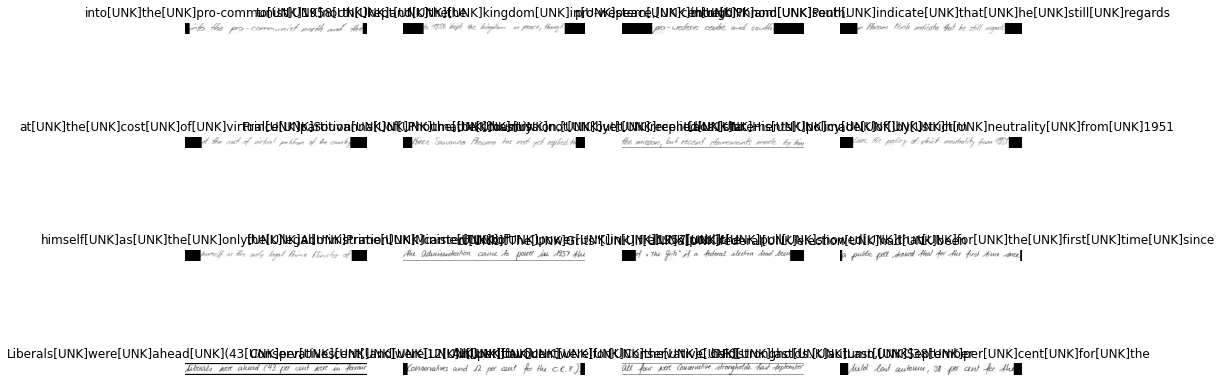

In [ ]:
for data in train_ds.take(1):
    images, labels = data["image"], data["label"]

    _, ax = plt.subplots(4, 4, figsize=(15, 8))

    for i in range(16):
        img = images[i]
        img = tf.image.flip_left_right(img)
        img = tf.transpose(img, perm=[1, 0, 2])
        img = (img * 255.0).numpy().clip(0, 255).astype(np.uint8)
        img = img[:, :, 0]

        # Gather indices where label!= padding_token.
        label = labels[i]
        indices = tf.gather(label, tf.where(tf.math.not_equal(label, padding_token)))
        # Convert to string.
        label = tf.strings.reduce_join(num_to_char(indices))
        label = label.numpy().decode("utf-8")

        ax[i // 4, i % 4].imshow(img, cmap="gray")
        ax[i // 4, i % 4].set_title(label)
        ax[i // 4, i % 4].axis("off")


plt.show()

In [ ]:

from keras.layers import *
from keras.models import *
from keras import backend as K
from tensorflow.keras import layers



class CTCLayer(keras.layers.Layer):
    def __init__(self, name=None):
        super().__init__(name=name)
        self.loss_fn = keras.backend.ctc_batch_cost

    def call(self, y_true, y_pred):
        batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
        input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
        label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

        input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
        label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")
        loss = self.loss_fn(y_true, y_pred, input_length, label_length)
        self.add_loss(loss)

        # At test time, just return the computed predictions.
        return y_pred



def build_model():
    # Inputs to the model
    input_img = keras.Input(shape=(image_width, image_height,1), name="image")
    labels = keras.layers.Input(name="label", shape=(None,))
   
    # First conv block.
    x = keras.layers.Conv2D(
        256,
        (3, 3),
        activation="relu",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv1",
    )(input_img)

    x = keras.layers.MaxPooling2D((2,2), name="pool1", padding = "same")(x)

    # Second conv block.
    x = keras.layers.Conv2D(
        512,
        (3, 3),
        activation="relu",
        kernel_initializer="he_normal",
        padding="same",
        name="Conv2",
    )(x)
    
    
    
    x = keras.layers.MaxPooling2D((2,2), name="pool2", padding = "same")(x)

    # We have used two max pool with pool size and strides 2.
    # Hence, downsampled feature maps are 4x smaller. The number of
    # filters in the last layer is 64. Reshape accordingly before
    # passing the output to the RNN part of the model.
    new_shape = ((image_width // 4), (image_height // 4) * 512)
    x = keras.layers.Reshape(target_shape=new_shape, name="reshape")(x)
    x = keras.layers.Dense(512, activation="relu", name="dense1")(x)
    x = keras.layers.Dropout(0.2)(x)

    # RNNs.
    x = keras.layers.Bidirectional(keras.layers.LSTM(512, return_sequences=True, dropout=0.25))(x)
    
    x = keras.layers.Bidirectional(keras.layers.LSTM(256, return_sequences=True, dropout=0.25))(x)
  
    # +2 is to account for the two special tokens introduced by the CTC loss.
    # The recommendation comes here: https://git.io/J0eXP.
    x = keras.layers.Dense(len(char_to_num.get_vocabulary())+2, activation="softmax", name="dense2")(x)

    # Add CTC layer for calculating CTC loss at each step.
    output = CTCLayer(name="ctc_loss")(labels, x)

    # Define the model.
    model = keras.models.Model(inputs=[input_img, labels], outputs=output, name="handwriting_recognizer")
    # Optimizer.
    opt = keras.optimizers.Adam()
    # Compile the model and return.
    model.compile(optimizer=opt)
    return model


# Get the model.
model = build_model()
model.summary()

Model: "handwriting_recognizer"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 image (InputLayer)             [(None, 512, 32, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 Conv1 (Conv2D)                 (None, 512, 32, 256  2560        ['image[0][0]']                  
                                )                                                                 
                                                                                                  
 pool1 (MaxPooling2D)           (None, 256, 16, 256  0           ['Conv1[0][0]']                  
                                )                                            

In [ ]:
from collections import defaultdict
from dataclasses import dataclass
from typing import Optional, List, Tuple

import numpy as np




def log(x: float) -> float:
    with np.errstate(divide='ignore'):
        return np.log(x)


@dataclass
class BeamEntry:
    """Information about one single beam at specific time-step."""
    pr_total: float = log(0)  # blank and non-blank
    pr_non_blank: float = log(0)  # non-blank
    pr_blank: float = log(0)  # blank
    pr_text: float = log(1)  # LM score
    lm_applied: bool = False  # flag if LM was already applied to this beam
    labeling: tuple = ()  # beam-labeling


class BeamList:
    """Information about all beams at specific time-step."""

    def __init__(self) -> None:
        self.entries = defaultdict(BeamEntry)

    def normalize(self) -> None:
        """Length-normalise LM score."""
        for k in self.entries.keys():
            labeling_len = len(self.entries[k].labeling)
            self.entries[k].pr_text = (1.0 / (labeling_len if labeling_len else 1.0)) * self.entries[k].pr_text

    def sort_labelings(self) -> List[Tuple[int]]:
        """Return beam-labelings, sorted by probability."""
        beams = self.entries.values()
        sorted_beams = sorted(beams, reverse=True, key=lambda x: x.pr_total + x.pr_text)
        return [x.labeling for x in sorted_beams]


def apply_lm(parent_beam: BeamEntry, child_beam: BeamEntry, chars: str, lm: LanguageModel) -> None:
    """Calculate LM score of child beam by taking score from parent beam and bigram probability of last two chars."""

    if not lm or child_beam.lm_applied:
        return

    # take bigram if beam length at least 2
    if len(child_beam.labeling) > 1:
        c = chars[child_beam.labeling[-2]]
        d = chars[child_beam.labeling[-1]]
        ngram_prob = lm.get_char_bigram(c, d)
    # otherwise take unigram
    else:
        c = chars[child_beam.labeling[-1]]
        ngram_prob = lm.get_char_unigram(c)
    
    lm_factor = 0.01  # influence of language model
    child_beam.pr_text = parent_beam.pr_text + lm_factor * log(ngram_prob)  # probability of char sequence
    child_beam.lm_applied = True  # only apply LM once per beam entry


def beam_search(mat: np.ndarray, chars: str, beam_width: int = 25, lm: Optional[LanguageModel] = None) -> str:
    """Beam search decoder.
    See the paper of Hwang et al. and the paper of Graves et al.
    Args:
        mat: Output of neural network of shape TxC.
        chars: The set of characters the neural network can recognize, excluding the CTC-blank.
        beam_width: Number of beams kept per iteration.
        lm: Character level language model if specified.
    Returns:
        The decoded text.
    """

    blank_idx = len(chars)
    max_T, max_C = mat.shape

    # initialise beam state
    last = BeamList()
    labeling = ()
    last.entries[labeling] = BeamEntry()
    last.entries[labeling].pr_blank = log(1)
    last.entries[labeling].pr_total = log(1)

    # go over all time-steps
    for t in range(max_T):
        curr = BeamList()

        # get beam-labelings of best beams
        best_labelings = last.sort_labelings()[:beam_width]

        # go over best beams
        for labeling in best_labelings:

            # probability of paths ending with a non-blank
            pr_non_blank = log(0)
            # in case of non-empty beam
            if labeling:
                # probability of paths with repeated last char at the end
                pr_non_blank = last.entries[labeling].pr_non_blank + log(mat[t, labeling[-1]])

            # probability of paths ending with a blank
            pr_blank = last.entries[labeling].pr_total + log(mat[t, blank_idx])

            # fill in data for current beam
            curr.entries[labeling].labeling = labeling
            curr.entries[labeling].pr_non_blank = np.logaddexp(curr.entries[labeling].pr_non_blank, pr_non_blank)
            curr.entries[labeling].pr_blank = np.logaddexp(curr.entries[labeling].pr_blank, pr_blank)
            curr.entries[labeling].pr_total = np.logaddexp(curr.entries[labeling].pr_total,
                                                           np.logaddexp(pr_blank, pr_non_blank))
            curr.entries[labeling].pr_text = last.entries[labeling].pr_text
            curr.entries[labeling].lm_applied = True  # LM already applied at previous time-step for this beam-labeling

            # extend current beam-labeling
            for c in range(max_C - 1):
                # add new char to current beam-labeling
                new_labeling = labeling + (c,)

                # if new labeling contains duplicate char at the end, only consider paths ending with a blank
                if labeling and labeling[-1] == c:
                    pr_non_blank = last.entries[labeling].pr_blank + log(mat[t, c])
                else:
                    pr_non_blank = last.entries[labeling].pr_total + log(mat[t, c])

                # fill in data
                curr.entries[new_labeling].labeling = new_labeling
                curr.entries[new_labeling].pr_non_blank = np.logaddexp(curr.entries[new_labeling].pr_non_blank,
                                                                       pr_non_blank)
                curr.entries[new_labeling].pr_total = np.logaddexp(curr.entries[new_labeling].pr_total, pr_non_blank)

                # apply LM
                apply_lm(curr.entries[labeling], curr.entries[new_labeling], chars, lm)

        # set new beam state
        last = curr

    # normalise LM scores according to beam-labeling-length
    last.normalize()

    # sort by probability
    best_labeling = last.sort_labelings()[0]  # get most probable labeling

    # map label string to char string
    res = ''.join([chars[label] for label in best_labeling])
    return res

In [ ]:
validation_images = []
validation_labels = []

for i in validation_ds:
    validation_images.append(i["image"])
    validation_labels.append(i["label"])

print(validation_labels[0])



tf.Tensor(
[[ 3 33  0 ... 99 99 99]
 [67 15  0 ... 99 99 99]
 [17 43  1 ... 99 99 99]
 ...
 [64 17 43 ... 99 99 99]
 [69 59 17 ... 99 99 99]
 [16 15 44 ... 99 99 99]], shape=(64, 75), dtype=int64)


In [ ]:
def calculate_edit_distance(labels, predictions):
    # Get a single batch and convert its labels to sparse tensors.
    saprse_labels = tf.cast(tf.sparse.from_dense(labels), dtype=tf.int64)

    # Make predictions and convert them to sparse tensors.
    input_len = np.ones(predictions.shape[0]) * predictions.shape[1]
    predictions_decoded = keras.backend.ctc_decode(
        predictions, input_length=probability_table, greedy=False, beam_width = 100
    )[0][0][:, :max_len]
    #predictions_decoded = beam_search(predictions, input_len)[0][0][:, :max_len]
    sparse_predictions = tf.cast(
        tf.sparse.from_dense(predictions_decoded), dtype=tf.int64
    )

    # Compute individual edit distances and average them out.
    edit_distances = tf.edit_distance(
        sparse_predictions, saprse_labels, normalize=False
    )
    return tf.reduce_mean(edit_distances)


class EditDistanceCallback(keras.callbacks.Callback):
    def __init__(self, pred_model):
        super().__init__()
        self.prediction_model = pred_model

    def on_epoch_end(self, epoch, logs=None):
        edit_distances = []

        for i in range(len(validation_images)):
            labels = validation_labels[i]
            predictions = self.prediction_model.predict(validation_images[i])
            edit_distances.append(calculate_edit_distance(labels, predictions).numpy())

        print(
            f"Mean edit distance for epoch {epoch + 1}: {np.mean(edit_distances):.4f}"
        )

In [ ]:
epochs = 10

model = build_model()
prediction_model = keras.models.Model(
    model.get_layer(name="image").input, model.get_layer(name="dense2").output
)
#edit_distance_callback = EditDistanceCallback(prediction_model)

# Train the model.
history = model.fit(
    train_ds,
    validation_data=validation_ds,
    epochs=epochs,
    #callbacks=[edit_distance_callback]
)


Epoch 1/30
  5/105 [>.............................] - ETA: 1:21:49 - loss: 260.7858

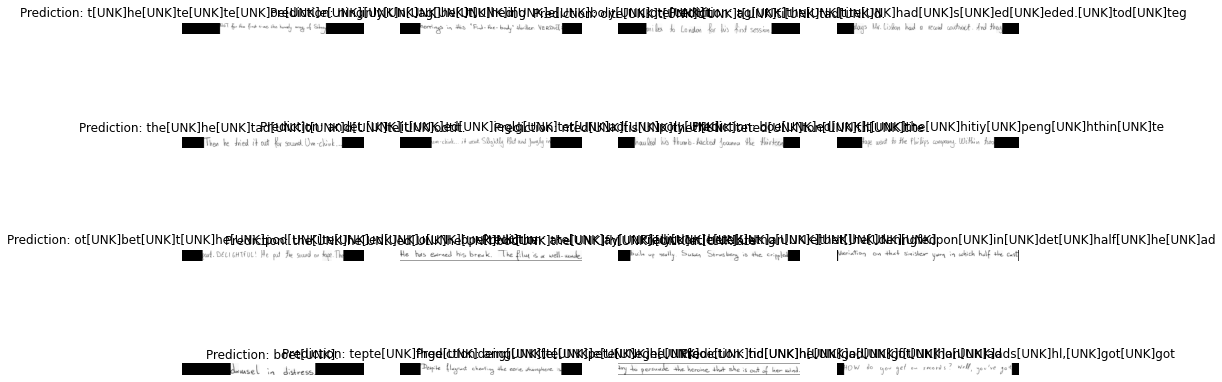

In [ ]:
def decode_batch_predictions(pred):
    input_len = np.ones(pred.shape[0]) * pred.shape[1]
    # Use greedy search. For complex tasks, you can use beam search.
    results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=False, beam_width = 100)[0][0][
        :, :max_len
    ]
    #results = beam_search(pred, input_len)[0][0][:, :max_len]
    # Iterate over the results and get back the text.
    output_text = []
    for res in results:
        res = tf.gather(res, tf.where(tf.math.not_equal(res, -1)))
        res = tf.strings.reduce_join(num_to_char(res)).numpy().decode("utf-8")
        output_text.append(res)
    return output_text


#  Let's check results on some test samples.
for batch in test_ds.take(1):
    batch_images = batch["image"]
    _, ax = plt.subplots(4, 4, figsize=(15, 8))

    preds = prediction_model.predict(batch_images)
    pred_texts = decode_batch_predictions(preds)

    for i in range(16):
        img = batch_images[i]
        img = tf.image.flip_left_right(img)
        img = tf.transpose(img, perm=[1, 0, 2])
        img = (img * 255.0).numpy().clip(0, 255).astype(np.uint8)
        img = img[:, :, 0]

        title = f"Prediction: {pred_texts[i]}"
        ax[i // 4, i % 4].imshow(img, cmap="gray")
        ax[i // 4, i % 4].set_title(title)
        ax[i // 4, i % 4].axis("off")

plt.show()